In [34]:
import networkx as nx
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import numpy as np

# Preprocessing

Since the graph is big, the actual algorithm would take a really long time to complete. To compute an approximate measure, the graph is reduced to about a half size. The number of nodes is reduced to 10000, and self looping edges are removed. 

In [39]:
random.seed(256)
f = pd.read_csv('PP-Pathways_ppi.csv', header = None)

In [40]:
G_base = nx.from_pandas_edgelist(f,  0,  1)
len(G_base.nodes)

21557

In [41]:
while len(G_base.nodes) > 15000:
    n = random.choice(list(G_base.nodes))
    G_base.remove_node(n)
for each in list(G_base.edges):
    if each[0] ==each[1]:
        G_base.remove_edge(each[0], each[1])

AUC method taken also cited by networkx: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6962390/

In [42]:
notedges = list(nx.non_edges(G_base))

In [43]:
def AUC(G, prediction, n = 100, alpha = 0.8):
    temp = []
    while len(temp)<n:
        e = random.choice(notedges)
        if G.has_node(e[0]) and G.has_node(e[1]):
            temp.append(e)
    preds = nx.common_neighbor_centrality(G, temp, alpha = alpha)
    predicted = []
    for u, v, p in preds:
        if p > 0:
            predicted.append((u,v,p))
    n1 = 0
    n2 = 0
    for each in predicted:
        temp = random.choice(prediction)
        if temp[2] > each[2]:
            n1 += 1
        elif temp[2] == each[2]:
            n2 += 2
    auc = (n1 + 0.5*n2)/n
    return auc

In [44]:
_, teste1 = train_test_split(list(G_base.edges), test_size = 0.2, random_state = 111)
_, teste2 = train_test_split(list(G_base.edges), test_size = 0.2, random_state = 222)
_, teste3 = train_test_split(list(G_base.edges), test_size = 0.2, random_state = 333)
_, teste4 = train_test_split(list(G_base.edges), test_size = 0.2, random_state = 444)
_, teste5 = train_test_split(list(G_base.edges), test_size = 0.2, random_state = 555)
testset = [teste1, teste2, teste3, teste4, teste5]

In [45]:
auc_scores = []
for test in testset:
    G = G_base.copy()
    for each in test:
        G.remove_edge(each[0],each[1])
    preds = nx.common_neighbor_centrality(G, test)
    predicted = []
    for u, v, p in preds:
        if p > 0:
            predicted.append((u,v,p))
    auc = AUC(G, predicted, alpha = 0.8)
    auc_scores.append(auc)


In [46]:
auc_scores

[0.76, 0.76, 0.82, 0.79, 0.9]

In [58]:
np.mean([0.76, 0.76, 0.82, 0.79, 0.9])

0.806

In [48]:
auc_scores = []
for test in testset:
    G = G_base.copy()
    for each in test:
        G.remove_edge(each[0],each[1])
    preds = nx.common_neighbor_centrality(G, test, alpha = 0.2)
    predicted = []
    for u, v, p in preds:
        if p > 0:
            predicted.append((u,v,p))
    auc = AUC(G, predicted, alpha = 0.2)
    auc_scores.append(auc)

In [49]:
auc_scores

[0.77, 0.79, 0.72, 0.71, 0.72]

In [59]:
np.mean([0.77, 0.79, 0.72, 0.71, 0.72])

0.742

In [51]:
auc_scores = []
for test in testset:
    G = G_base.copy()
    for each in test:
        G.remove_edge(each[0],each[1])
    preds = nx.common_neighbor_centrality(G, test, alpha = 0.4)
    predicted = []
    for u, v, p in preds:
        if p > 0:
            predicted.append((u,v,p))
    auc = AUC(G, predicted, alpha = 0.4)
    auc_scores.append(auc)

In [52]:
auc_scores

[0.72, 0.81, 0.71, 0.75, 0.77]

In [60]:
np.mean([0.72, 0.81, 0.71, 0.75, 0.77])

0.752

In [54]:
auc_scores = []
for test in testset:
    G = G_base.copy()
    for each in test:
        G.remove_edge(each[0],each[1])
    preds = nx.common_neighbor_centrality(G, test, alpha = 0.6)
    predicted = []
    for u, v, p in preds:
        if p > 0:
            predicted.append((u,v,p))
    auc = AUC(G, predicted, alpha = 0.6)
    auc_scores.append(auc)

In [55]:
auc_scores

[0.75, 0.87, 0.72, 0.71, 0.84]

In [61]:
np.mean([0.75, 0.87, 0.72, 0.71, 0.84])

0.7779999999999999

In [57]:
import matplotlib.pyplot as plt

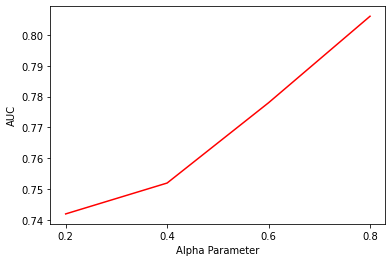

In [66]:
plt.xticks([0.2,0.4,0.6,0.8])
plt.xlabel("Alpha Parameter")
plt.ylabel("AUC")
plt.plot([0.2,0.4,0.6,0.8], [0.742, 0.752, 0.777999, 0.806], color = 'r')
plt.savefig('CCPA.png')